(0.0, 8.0)

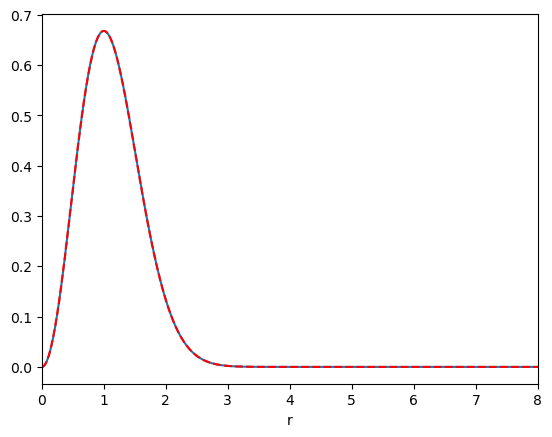

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

N = 30                                           # Truncation ordem

L0 = 1                                             # Map parameter 

col1 = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))        # Collocation points w origin included - CGL - Grid 1
col2 = np.cos((2*(np.arange(2*N + 3))+1)*math.pi /(2*(2*N + 2)+2))      # Collocation points w origin not included - CG - Grid 2 (Verificado)      
                                
    
colr1 = col1[1:N+2]             
colr2 = col2[0:N+1] 

# Physical domain  

r_2 = L0 * colr2/(np.sqrt(1-colr2**2))                    
r1 = L0 * colr1/(np.sqrt(1-colr1**2))                    

r = np.flip(r1)     # rearrange the points in a crescent order                                       
r2 = np.flip(r_2)

# Base Matrix (Chebyshev Polinomials TB_2n):

# Grid 1 (CGL)

TB = np.zeros([N+3,N+1])
rTB = np.zeros([N+3,N+1])
rrTB = np.zeros([N+3,N+1])

for i in range(N+3):                                    # TB[:,0] = function in origin
  TB[i,] = np.cos((2*i)*np.arctan(L0/r)) 

for i in range(N+3):                                    # TB[:,0] = function in origin
  rTB[i,] = -(2*L0*np.sinh(2*np.arctan(L0/r)))/(L0**2 + r**2)

for i in range(N+3):   
  rrTB[i,] = (4*L0*(L0*np.cosh(2*np.arctan(L0/r)) + r*np.sinh(2*np.arctan(L0/r))))/(L0**2 + r**2)**2

# Grid 2 (CG):

TB_2 = np.zeros([N+3,N+1])
rTB_2 = np.zeros([N+3,N+1])
rrTB_2 = np.zeros([N+3,N+1])

for i in range(N+3):                                    # TB[:,0] = function in origin
  TB_2[i,] = np.cos((2*i)*np.arctan(L0/r2)) 

for i in range(N+3):                                    # TB[:,0] = function in origin
  rTB_2[i,] = -(2*L0*np.sinh(2*np.arctan(L0/r2)))/(L0**2 + r2**2)

for i in range(N+3):   
  rrTB_2[i,] = (4*L0*(L0*np.cosh(2*np.arctan(L0/r2)) + r2*np.sinh(2*np.arctan(L0/r2))))/(L0**2 + r2**2)**2


# Base Matrix (Rational Tchebyshev Polinomials SB_2n):

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)           

# Base Matrix (Rational Tchebyshev Polinomials SB_2n+1): 

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


# Base function in Grid 1:

psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]


# Grid 2 (CG):

SB_2 = np.zeros([N+2,N+1])
rSB_2 = np.zeros([N+2,N+1])
rrSB_2 = np.zeros([N+2,N+1])

for i in range(N+1+1):                                    # SB2[:,0] = function not in origin
  SB_2[i,] = np.sin((2*i+1)*np.arctan(L0/r2))                                                  

for i in range(N+1+1):
  rSB_2[i,] = -np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**2*(1+L0**2/r2**2)) 

for i in range(N+1+1):
  rrSB_2[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)                     

# Base function in Grid 2:

psi_2 = SB_2[0:N+1,:]        # origin not included in psi_2[:,0]
rpsi_2 = rSB_2[0:N+1,:]
rrpsi_2 = rrSB_2[0:N+1,:]
            

# Initial conditions of Phi (Scalar field):                                    

r0 = 0

A0 = 0.908142        # 0.90814 -> Disperse;  #    0.908145    -> AH      (Scalar field amplitude)

sigma = 1


Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))      # Phi initial data w/ origin included (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

# Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]


Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)

#plt.show()


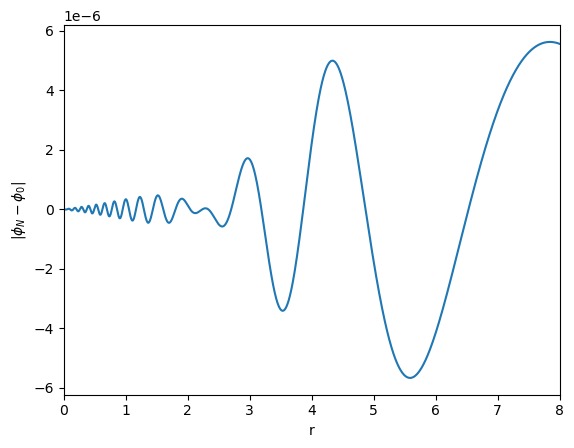

In [2]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [11]:
# Initial conditions for Alpha:

alpha0=1-A0*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))

al0 = np.dot(alpha0 - 1, inv_psi)

# Initial conditions for Pi:

# Initial values for K:

K0 = A0/20*r2**2*(np.exp(-(r2)**2/sigma**2) + np.exp(-(r2)**2/sigma**2))

# Base functions of Pi:

TB1 = 1/2*(TB[1:(N+2),:] - TB[0:(N+1),:])         
rTB1 = 1/2*(rTB[1:(N+2),:] - rTB[0:(N+1),:])
rrTB1 = 1/2*(rrTB[1:(N+2),:] - rrTB[0:(N+1),:])


TB1_2 = 1/2*(TB_2[1:(N+2),:] - TB_2[0:(N+1),:])         
rTB1_2 = 1/2*(rTB_2[1:(N+2),:] - rTB_2[0:(N+1),:])
rrTB1_2 = 1/2*(rrTB_2[1:(N+2),:] - rrTB_2[0:(N+1),:])

inv_TB1 = np.linalg.inv(TB1)

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, inv_TB1)
Pi = np.dot(b0, TB1)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr 

tol = 1e-19
n = 0
nf = 100

# Newton Raphson loop

while n <= nf:  
  Chi = np.dot(c0, psi)  
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2 + np.exp(4*Chi[0])*K0[0]/4 - 1/2*np.exp(4*Chi[0])*(Pi[0]**2 + np.exp(-4*Chi[0])*rPhi[0]**2)
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2 + np.exp(4*Chi[1:N+1])*K0[1:N+1]/4 - 1/2*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2)
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1] + 4*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*K0[1:N+1]/4 - 2*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) + 1/2*np.exp(4*Chi[1:N+1])*(4*psi[:,1:N+1]*np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) 
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1


In [12]:
c0

array([ 2.77660442e-03,  2.92302241e-04, -7.00759018e-05, -5.15393247e-05,
       -8.79683145e-06,  6.08913971e-06,  5.24761868e-06,  1.61508207e-06,
       -4.14914213e-07, -7.65647845e-07, -4.43569971e-07, -8.84736784e-08,
        7.95255245e-08,  1.01689437e-07,  5.82940958e-08,  1.49954618e-08,
       -9.92996736e-09, -1.46134481e-08, -1.07154912e-08, -3.82775534e-09,
        2.59364262e-10,  2.43550831e-09,  2.03351172e-09,  1.47345641e-09,
        3.06095255e-10,  1.39947701e-11, -4.62979527e-10, -2.04159086e-10,
       -3.48257247e-10,  1.27631602e-12, -1.53287567e-10])

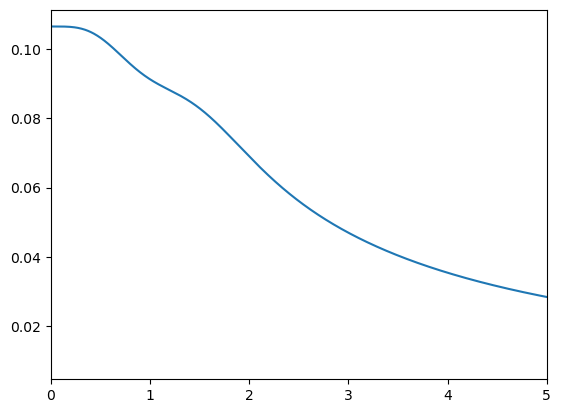

In [4]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [5]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# Grid 1: 

SB1 = 1/2*(TB[2:(N+3),:] - TB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rTB[2:(N+3),:] - rTB[0:(N+1),:])
rrSB1 = 1/2*(rrTB[2:(N+3),:] - rrTB[0:(N+1),:])

# Grid 2: 

SB1_2 = 1/2*(TB_2[2:(N+3),:] - TB_2[0:(N+1),:])         
rSB1_2 = 1/2*(rTB_2[2:(N+3),:] - rTB_2[0:(N+1),:])
rrSB1_2 = 1/2*(rrTB_2[2:(N+3),:] - rrTB_2[0:(N+1),:])




# Base functions for Beta

# Grid 1

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])


for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                 

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))   

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)


# Grid 2

SB2_2 = np.zeros([N+1,N+1])      
rSB2_2 = np.zeros([N+1,N+1])
rrSB2_2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2_2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r2))                                                  


for i in range(N+1):
  rSB2_2[i,] = -np.cos((2*i+2)*np.arctan(L0/r2))*(2*i+2)*L0/(r2**2*(1+L0**2/r2**2))


for i in range(N+1):
  rrSB2_2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)












In [6]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qSB[1:(N+2),:] + qrrSB[0:(N+1),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [7]:
# Filtering

Nc = 200

Nf = N - Nc

coef_f = 36
s = 20

filter1 = np.ones(N+1)
filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
#filter2 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc))/(N-Nc))**s)))

In [ ]:
# Runge Kutta 4th order
import time

init = time.time()

h = 0.0002   # step size
tf = 8.5

It = int(tf/h)

t = 0

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, TB1)   
  rPi= np.dot(b0, rTB1)
    
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi) 

  Phi_2 = np.dot(a0, psi_2)
  rPhi_2 = np.dot(a0, rpsi_2)  
  
  Pi_2 = np.dot(b0, TB1_2)  
    
  Chi_2 = np.dot(c0, psi_2)
  rChi_2 = np.dot(c0, rpsi_2)  
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)


  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Alpha_2 = 1 + np.dot(al0, psi_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  
  Beta_2 = np.dot(be0, SB2_2)
  rBeta_2 = np.dot(be0, rSB2_2)
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(phi_0))
  out_p.write(',\n')
    
  # Second step
  Phi = np.dot(a0 + L1, psi)      
  rPhi = np.dot(a0 + L1, rpsi)
  rrPhi = np.dot(a0 + L1, rrpsi)

  Pi = np.dot(b0 + N1, TB1)   
  rPi= np.dot(b0 + N1, rTB1)
    
  Chi = np.dot(c0 + K1, psi) 
  rChi = np.dot(c0 + K1, rpsi)
  rrChi = np.dot(c0 + K1, rrpsi) 

  Phi_2 = np.dot(a0 + L1, psi_2)
  rPhi_2 = np.dot(a0 + L1, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N1, TB1_2)  
    
  Chi_2 = np.dot(c0 + K1, psi_2)
  rChi_2 = np.dot(c0 + K1, rpsi_2)  
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)

  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Alpha_2 = 1 + np.dot(al0, psi_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  
  Beta_2 = np.dot(be0, SB2_2)
  rBeta_2 = np.dot(be0, rSB2_2)

    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)      
  rPhi = np.dot(a0 + L2/2, rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)

  Pi = np.dot(b0 + N2/2, TB1)   
  rPi= np.dot(b0 + N2/2, rTB1)
    
  Chi = np.dot(c0 + K2/2, psi) 
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi) 

  Phi_2 = np.dot(a0 + L2/2, psi_2)
  rPhi_2 = np.dot(a0 + L2/2, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N2/2, TB1_2)  
    
  Chi_2 = np.dot(c0 + K2/2, psi_2)
  rChi_2 = np.dot(c0 + K2/2, rpsi_2)  
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)


  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Alpha_2 = 1 + np.dot(al0, psi_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  
  Beta_2 = np.dot(be0, SB2_2)
  rBeta_2 = np.dot(be0, rSB2_2)
    
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step  
  Phi = np.dot(filter1*a0 + L3, psi)     
  rPhi= np.dot(filter1*a0 + L3 , rpsi)
  rrPhi = np.dot(filter1*a0 + L3, rrpsi)
    
  Pi = np.dot(filter1*b0 + N3, TB1)
  rPi= np.dot(filter1*b0 + N3, rTB1)
    
  Chi = np.dot(filter1*c0 + K3, psi)
  rChi = np.dot(filter1*c0 + K3, rpsi)
  rrChi = np.dot(filter1*c0 + K3, rrpsi)

  Phi_2 = np.dot(filter1*a0 + L3, psi_2)
  rPhi_2 = np.dot(filter1*a0 + L3, rpsi_2)  
  
  Pi_2 = np.dot(filter1*b0 + N3, TB1_2)  
    
  Chi_2 = np.dot(filter1*c0 + K3, psi_2)
  rChi_2 = np.dot(filter1*c0 + K3, rpsi_2) 
     
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)


  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Alpha_2 = 1 + np.dot(al0, psi_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  
  Beta_2 = np.dot(be0, SB2_2)
  rBeta_2 = np.dot(be0, rSB2_2)
    
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  
  print(t) 
#  if t > 9:
#    h=0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()   
    
fim = time.time()    

tex = (fim - init)/60

t1 = np.linspace(0, tf, len(Alpha_origin)) 

0.0002
0.0004
0.0006000000000000001
0.0008
0.001
0.0012000000000000001
0.0014000000000000002
0.0016000000000000003
0.0018000000000000004
0.0020000000000000005
0.0022000000000000006
0.0024000000000000007
0.0026000000000000007
0.002800000000000001
0.003000000000000001
0.003200000000000001
0.003400000000000001
0.003600000000000001
0.0038000000000000013
0.004000000000000001
0.004200000000000001
0.0044
0.0046
0.0048
0.004999999999999999
0.005199999999999999
0.0053999999999999986
0.005599999999999998
0.005799999999999998
0.0059999999999999975
0.006199999999999997
0.006399999999999997
0.0065999999999999965
0.006799999999999996
0.006999999999999996
0.0071999999999999955
0.007399999999999995
0.007599999999999995
0.0077999999999999944
0.007999999999999995
0.008199999999999995
0.008399999999999996
0.008599999999999997
0.008799999999999997
0.008999999999999998
0.009199999999999998
0.009399999999999999
0.0096
0.0098
0.01
0.0102
0.010400000000000001
0.010600000000000002
0.010800000000000002
0.011000

0.08300000000000032
0.08320000000000033
0.08340000000000033
0.08360000000000034
0.08380000000000035
0.08400000000000035
0.08420000000000036
0.08440000000000036
0.08460000000000037
0.08480000000000038
0.08500000000000038
0.08520000000000039
0.08540000000000039
0.0856000000000004
0.0858000000000004
0.08600000000000041
0.08620000000000042
0.08640000000000042
0.08660000000000043
0.08680000000000043
0.08700000000000044
0.08720000000000044
0.08740000000000045
0.08760000000000046
0.08780000000000046
0.08800000000000047
0.08820000000000047
0.08840000000000048
0.08860000000000048
0.08880000000000049
0.0890000000000005
0.0892000000000005
0.0894000000000005
0.08960000000000051
0.08980000000000052
0.09000000000000052
0.09020000000000053
0.09040000000000054
0.09060000000000054
0.09080000000000055
0.09100000000000055
0.09120000000000056
0.09140000000000056
0.09160000000000057
0.09180000000000058
0.09200000000000058
0.09220000000000059
0.09240000000000059
0.0926000000000006
0.0928000000000006
0.09300

0.1660000000000027
0.1662000000000027
0.1664000000000027
0.16660000000000272
0.16680000000000272
0.16700000000000273
0.16720000000000274
0.16740000000000274
0.16760000000000275
0.16780000000000275
0.16800000000000276
0.16820000000000276
0.16840000000000277
0.16860000000000278
0.16880000000000278
0.1690000000000028
0.1692000000000028
0.1694000000000028
0.1696000000000028
0.1698000000000028
0.17000000000000282
0.17020000000000282
0.17040000000000283
0.17060000000000283
0.17080000000000284
0.17100000000000284
0.17120000000000285
0.17140000000000286
0.17160000000000286
0.17180000000000287
0.17200000000000287
0.17220000000000288
0.17240000000000288
0.1726000000000029
0.1728000000000029
0.1730000000000029
0.1732000000000029
0.1734000000000029
0.17360000000000292
0.17380000000000292
0.17400000000000293
0.17420000000000294
0.17440000000000294
0.17460000000000295
0.17480000000000295
0.17500000000000296
0.17520000000000296
0.17540000000000297
0.17560000000000298
0.17580000000000298
0.17600000000

0.2498000000000051
0.2500000000000051
0.2502000000000051
0.25040000000000506
0.25060000000000504
0.250800000000005
0.251000000000005
0.251200000000005
0.25140000000000495
0.25160000000000493
0.2518000000000049
0.2520000000000049
0.25220000000000486
0.25240000000000484
0.2526000000000048
0.2528000000000048
0.2530000000000048
0.25320000000000475
0.25340000000000473
0.2536000000000047
0.2538000000000047
0.25400000000000467
0.25420000000000464
0.2544000000000046
0.2546000000000046
0.2548000000000046
0.25500000000000456
0.25520000000000453
0.2554000000000045
0.2556000000000045
0.25580000000000447
0.25600000000000445
0.2562000000000044
0.2564000000000044
0.2566000000000044
0.25680000000000436
0.25700000000000434
0.2572000000000043
0.2574000000000043
0.25760000000000427
0.25780000000000425
0.2580000000000042
0.2582000000000042
0.2584000000000042
0.25860000000000416
0.25880000000000414
0.2590000000000041
0.2592000000000041
0.25940000000000407
0.25960000000000405
0.259800000000004
0.26000000000

0.3351999999999957
0.3353999999999957
0.3355999999999957
0.33579999999999566
0.33599999999999564
0.3361999999999956
0.3363999999999956
0.33659999999999557
0.33679999999999555
0.3369999999999955
0.3371999999999955
0.3373999999999955
0.33759999999999546
0.33779999999999544
0.3379999999999954
0.3381999999999954
0.33839999999999537
0.33859999999999535
0.3387999999999953
0.3389999999999953
0.3391999999999953
0.33939999999999526
0.33959999999999524
0.3397999999999952
0.3399999999999952
0.3401999999999952
0.34039999999999515
0.34059999999999513
0.3407999999999951
0.3409999999999951
0.34119999999999506
0.34139999999999504
0.341599999999995
0.341799999999995
0.341999999999995
0.34219999999999495
0.34239999999999493
0.3425999999999949
0.3427999999999949
0.34299999999999486
0.34319999999999484
0.3433999999999948
0.3435999999999948
0.3437999999999948
0.34399999999999475
0.34419999999999473
0.3443999999999947
0.3445999999999947
0.34479999999999467
0.34499999999999464
0.3451999999999946
0.3453999999

In [ ]:
print(tex)

In [ ]:
# Searching for critical amplitude:
#%matplotlib notebook

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 03, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
#matplotlib notebook

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 03 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 
plt.show

In [ ]:
# Erro L2 of Hamiltonian constraint

#plt.plot(t1,L2HC, label = " $A_0$ = {:}".format(A0))
#plt.yscale("log")
#plt.ylabel("log(L2HC)")
#plt.xlabel("t")
#plt.title("log(L2HC) para $N = 600$, $L_0 = 5$")
#plt.legend()

In [ ]:
for i in range(It):
    plt.plot(phi_set[i])

In [ ]:
# 2D Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-2.5, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot


def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.5, blit=True)

HTML(anim.to_html5_video())

In [ ]:
# Plot 3D for Phi:

from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook
rplot = np.linspace(0.000001,80,M)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[6500]
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
ax2.axis('off')

plt.show()

In [ ]:
# 3D animation plot for Phi:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

rplot = np.linspace(0.000001,80,M)
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.ylim(-2.5, 3)
ax2 = fig.add_subplot(122, projection='3d')

xn = np.outer(rplot, np.cos(theta))
yn = np.outer(rplot, np.sin(theta))
zn = np.zeros_like(xn)

def update_plot(i):
    ax1.clear()
    ax2.clear()

    y = phi_set[i]
    x = rplot

    for j in range(len(x)):
        zn[j,:] = np.full_like(zn[0], y[j])

    ax1.plot(x, y)
    ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
    ax2.axis('off')

 
    
ani = animation.FuncAnimation(fig, update_plot, frames=len(phi_set), interval=1)
ani.save("animation_colapse_N500_CG_2grids.mp4")

#for i in range(0, len(phi_set), 2):
#    ani.frame_seq = ani.new_frame_seq(slice(i, i+1))
#    ani.save(f"plot_{i}.png")


#HTML(ani.to_html5_video())

plt.show()

